#Rain Prediction in Australia

# Importing certain libraries 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # SVC(Support Vector Classifier) fits to the data, and returns a "best fit" hyperplane that divides, or categorizes, the data

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix, classification_report
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [ ]:
path = 'https://raw.githubusercontent.com/dwipddalal/Rainfall-prediction-using-ensemble-learning/main/Rainfall%20data.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [ ]:
print(df.shape)

(24196, 23)


In [ ]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [ ]:
df.isnull().sum() 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h3 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Use Feature Encoding :</h3>

In [ ]:
ohe = pd.get_dummies(data=df)
print(ohe.shape)
ohe.head()
k = (ohe!=df)
print(k.sum())

(24196, 23)
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Split the data into train and test.</h1>

In [ ]:
from sklearn.model_selection import train_test_split

y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2021, test_size=0.2)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (19356, 22)
X_test: (4840, 22)
y_train: (19356,)
y_test: (4840,)


In [ ]:
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
7320,2257,18,23.1,28.3,0.0,2.6,0.8,2,39,9,...,24,79,74,1013.8,1010.8,7,7,25.6,25.9,0
5641,1578,10,17.6,23.1,0.4,4.8,7.4,0,41,2,...,30,74,74,1023.3,1020.7,7,2,20.0,21.6,0
9515,1881,14,13.5,19.0,0.2,4.6,2.1,14,57,6,...,31,80,89,1012.1,1009.9,8,6,17.2,19.0,0
16297,861,10,20.6,25.5,0.0,6.8,10.6,0,63,0,...,33,68,64,1021.7,1020.0,2,4,22.7,24.8,0
7017,2634,1,18.4,31.2,0.0,6.0,11.1,9,39,9,...,30,64,39,1014.6,1010.8,1,1,25.1,30.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,1147,4,22.6,26.3,18.4,3.4,0.0,1,44,1,...,24,85,78,1011.8,1010.7,8,7,24.5,25.7,1
20318,3211,20,7.8,25.5,0.0,7.4,13.1,10,24,8,...,9,64,35,1016.1,1014.0,3,5,15.4,24.2,0
2669,2729,14,4.6,15.5,0.2,1.2,5.6,3,44,3,...,20,91,57,1018.4,1013.2,8,8,8.0,14.5,0
17536,432,0,23.1,30.5,29.8,6.4,7.4,4,28,5,...,11,73,51,1016.3,1015.0,6,6,27.3,29.5,1


<h2 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scale the data using Standard Scaler :</h2>

Many machine learning estimators require dataset standardization: if the individual features do not more or less resemble standard normally distributed data, they may perform poorly.

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(19356, 22)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train a Logistic Regression with all default parameters</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=2021)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2021)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix using plot_confusion_matrix module :</h1>

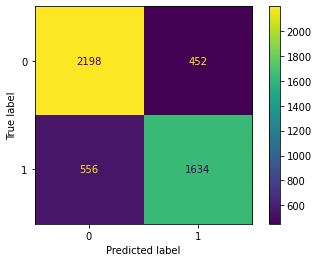

In [ ]:
y_pred = logreg.predict(X_test_scaled)
confusion_matrix_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_LR = plot_confusion_matrix(logreg, X_test_scaled,y_test)
print(confusion_matrix_LR)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for LR :</h1>

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2650
           1       0.78      0.75      0.76      2190

    accuracy                           0.79      4840
   macro avg       0.79      0.79      0.79      4840
weighted avg       0.79      0.79      0.79      4840



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with Accuracy score for LR :</h1> 

In [ ]:
print("Train Data Score: {}".format(logreg.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(logreg.score(X_test_scaled, y_test)))

Train Data Score: 0.8002686505476339
Test Data Score: 0.7917355371900826


In [ ]:
print('Accuracy -> ',accuracy_score(y_test,y_pred))

Accuracy ->  0.7917355371900826


<h3 style="background-color:#ABFF9B;font-size:15px;color:#00033E;font-weight : bold">ROC - AUC Score for LR :</h3> 

In [ ]:
print(roc_auc_score(y_test,y_pred))

0.7877763418626691


<h3 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 50 and gamma = scale :</h3>

In [ ]:
from sklearn.pipeline import make_pipeline 
clf = make_pipeline(StandardScaler(), SVC(gamma='scale', C = 50, probability = True))
clf.fit(X_train_scaled, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=50, probability=True))])

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix for SVM :</h1>

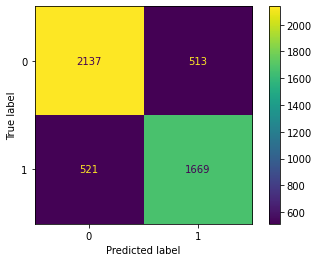

In [ ]:
y_pred = clf.predict(X_test_scaled)
confusion_matrix_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_LR = plot_confusion_matrix(clf, X_test_scaled,y_test)
print(confusion_matrix_LR)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for SVM :</h1>

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2650
           1       0.76      0.76      0.76      2190

    accuracy                           0.79      4840
   macro avg       0.78      0.78      0.78      4840
weighted avg       0.79      0.79      0.79      4840



<h3 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Accuracy score for SVM :</h3>

In [ ]:
print('Accuracy -> ',accuracy_score(y_test,y_pred))

Accuracy ->  0.7863636363636364


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score for SVM :</h1> 

In [ ]:
print("Train Data Score: {}".format(clf.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(clf.score(X_test_scaled, y_test)))

Train Data Score: 0.9255528001653234
Test Data Score: 0.7863636363636364


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for SVM :</h1> 

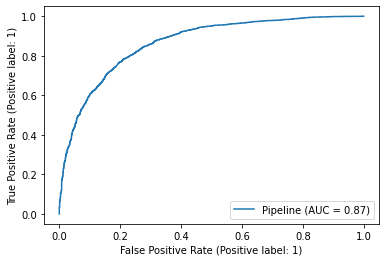

In [ ]:
## Set appropriate X label, Y label and Title for the graph
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test_scaled, y_test)
plt.show()

In [ ]:
## ======== YOUR CODE HERE ======== ##
## Print out ROC score for SVM
print(roc_auc_score(y_test,y_pred))
## ================================ ##

0.7842577754803137


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 1 and gamma = scale :</h1> 

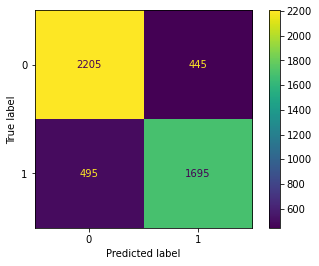

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Train SVM with new mentioned parameters
clf = make_pipeline(StandardScaler(), SVC(gamma='scale', C = 1, probability = True))
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
confusion_matrix_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_LR = plot_confusion_matrix(clf, X_test_scaled,y_test)

## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for new SVM :</h1>

In [ ]:
print(confusion_matrix_LR)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for the new SVM :</h1> 

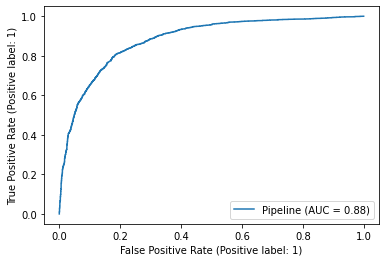

In [ ]:
## ======== YOUR CODE HERE ======== ##
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test_scaled, y_test)
plt.show()
## ================================ ##

In [ ]:
print(roc_auc_score(y_test,y_pred))

0.8030240372189197


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with accuracy score for the new SVM :</h1> 

In [ ]:
print('Accuracy -> ',accuracy_score(y_test,y_pred))
print("Train Data Score: {}".format(clf.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(clf.score(X_test_scaled, y_test)))

Accuracy ->  0.8057851239669421
Train Data Score: 0.8337983054350072
Test Data Score: 0.8057851239669421
